# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [257]:
import pandas as pd

### DATA IMPORT

In [258]:

data = pd.read_csv('Wholesale_Data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### DATA CLEANING

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [260]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [261]:
data['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [262]:
data['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [263]:
data[data['Fresh'] < 100]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,2,3,85,20959,45828,36,24231,1423
66,1,3,9,1534,7417,175,3468,27
95,1,3,3,2920,6252,440,223,709
96,2,3,23,2616,8118,145,3874,217
218,2,1,18,7504,15205,1285,4797,6372
338,1,2,3,333,7021,15601,15,550
357,2,3,37,1275,22272,137,6747,110
412,1,3,97,3605,12400,98,2970,62


There are several customers that have annual sales of fresh goods in MU less than 100. I don't know if this makes sense or not since we don't know what an MU is, but these values are greatly below the mean of 12,000 MU. Since this is a wholesale distributor a customer could only purchase non-fresh products, so this could make sense, so I will leave this as is

In [264]:
data[data['Milk'] < 500]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
97,1,3,403,254,610,774,54,63
98,1,3,503,112,778,895,56,132
122,1,3,12212,201,245,1991,25,860
154,1,3,622,55,137,75,7,8
191,1,3,13624,295,1381,890,43,84
219,1,1,4155,367,1390,2306,86,130
238,1,1,7363,475,585,1112,72,216
247,1,1,13569,346,489,2077,44,659
255,1,1,31614,489,1495,3242,111,615
269,1,1,15218,258,1138,2516,333,204


Customers with low milk purchases either purchase low quantities of everything or purchase a lot or fresh products. This makes sense will leave this as is

In [265]:
data[data['Grocery'] < 1000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,1,3,56159,555,902,10002,212,2916
75,1,3,20398,1137,3,4407,3,975
97,1,3,403,254,610,774,54,63
98,1,3,503,112,778,895,56,132
122,1,3,12212,201,245,1991,25,860
130,1,3,7149,2428,699,6316,395,911
131,1,3,2101,589,314,346,70,310
148,1,3,5924,584,542,4052,283,434
154,1,3,622,55,137,75,7,8
161,1,3,12434,540,283,1092,3,2233


Despite have a values below the mean, nothing looks unusual when looking at the other features. As with milk above, customer purchase low quantities of all products or purchase a large amount of fresh products

In [266]:
data[data['Frozen'] < 100]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,2,3,4591,15729,16709,33,6956,433
57,2,3,5417,9933,10487,38,7572,1282
60,2,3,8590,3045,7854,96,4095,225
65,2,3,85,20959,45828,36,24231,1423
145,2,3,22039,8384,34792,42,12591,4430
154,1,3,622,55,137,75,7,8
175,2,3,2343,7845,11874,52,4196,1697
184,1,3,327,918,4710,74,334,11
221,1,1,5396,7503,10646,91,4167,239
264,2,1,1073,9679,15445,61,5980,1265


Frozen items are not as popular. Customers are below the mean, but filling with the average values may be inappropriate for these customers

In [267]:
data[data['Detergents_Paper'] < 100]	

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,1,3,20398,1137,3,4407,3,975
90,1,3,11405,596,1638,3347,69,360
93,1,3,11314,3090,2062,35009,71,2698
97,1,3,403,254,610,774,54,63
98,1,3,503,112,778,895,56,132
122,1,3,12212,201,245,1991,25,860
131,1,3,2101,589,314,346,70,310
134,1,3,7388,1882,2174,720,47,537
141,1,3,30379,13252,5189,321,51,1450
142,1,3,37036,7152,8253,2995,20,3


Same as frozen above

In [268]:
data[data['Fresh'] > 50000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,1,3,56159,555,902,10002,212,2916
103,1,3,56082,3504,8906,18028,1480,2498
125,1,3,76237,3473,7102,16538,778,918
181,1,3,112151,29627,18148,16745,4948,8550
258,1,1,56083,4563,2124,6422,730,3321
259,1,1,53205,4959,7336,3012,967,818
284,1,3,68951,4411,12609,8692,751,2406


Row #181 could possibly be a problem becuase it is an outlier at 112,151 MU, 40,000 more than the previous item and is more than double the mean and will cause problems for the models

In [269]:
data[data['Milk'] > 40000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
183,1,3,36847,43950,20170,36534,239,47943


Row #86 is an outlier for milk at 73,498 MU, 20,000 more than the next item

In [270]:
data[data['Grocery'] > 50000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215


Row #85 is an outlier for grocery at 92,780 MU, 25,000 more than the previous item

In [271]:
data[data['Frozen'] > 20000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,1,3,11314,3090,2062,35009,71,2698
183,1,3,36847,43950,20170,36534,239,47943
325,1,2,32717,16784,13626,60869,1272,5609


Row #325 is an outlier for frozen at 60,869 MU, 25,000 more than the previous item

In [272]:
data[data['Detergents_Paper'] > 20000]	

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
333,2,2,8565,4980,67298,131,38102,1215


Row #85 is addressed above.
Row #333 is an outlier for detergents paper at 38,102 MU, 12,000 more than the previous item

### Data Cleaning Summary

- There are no null values in the dataset.
- There are many low feature values below the mean for customers that do not appear inappropriate when looking at the data. Filling the values with the mean could be inappropriate if the values are accurate. There is no way of knowing this for the assignment so they were kept unchanged.
- There were outliers identified during the clearning process that will be removed to aid in unsupervised ML modeling.

In [273]:
data = data[(data['Fresh'] < 100000) &
            (data['Milk'] < 70000) &
            (data['Grocery'] < 90000) &
            (data['Frozen'] < 60000) &
            (data['Detergents_Paper'] < 38000) &
            (data['Delicassen'] < 10000)
            ]

In [274]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Exploratory Data Analysis - Visualizations

Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

In [275]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

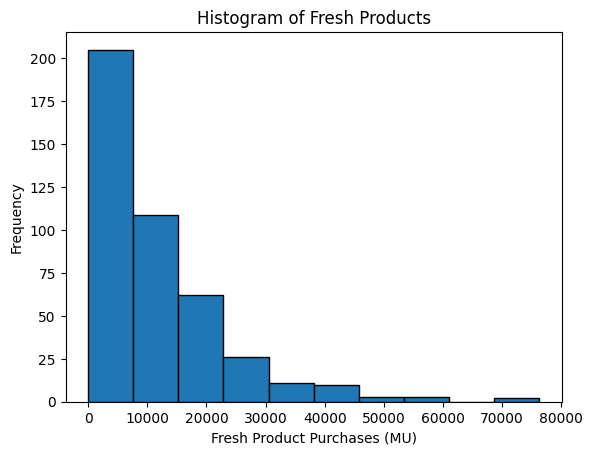

In [276]:
# Create the histogram
plt.hist(data['Fresh'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Fresh Products')
plt.xlabel('Fresh Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [277]:
# Filter for additional outlier detected via histogram
data = data[data['Fresh'] < 65000]

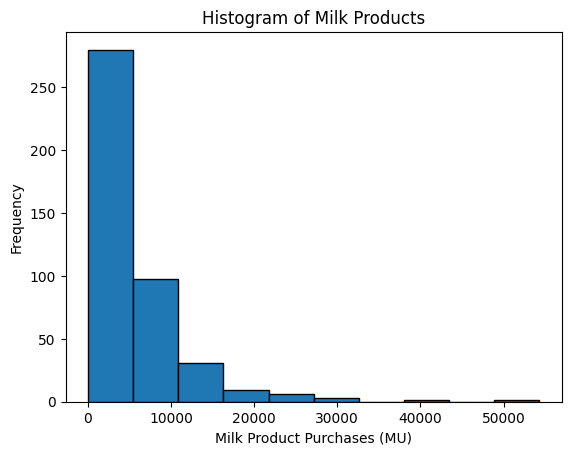

In [278]:
# Create the histogram
plt.hist(data['Milk'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Milk Products')
plt.xlabel('Milk Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [279]:
# Filter for additional outlier detected via histogram
data = data[data['Milk'] < 35000]

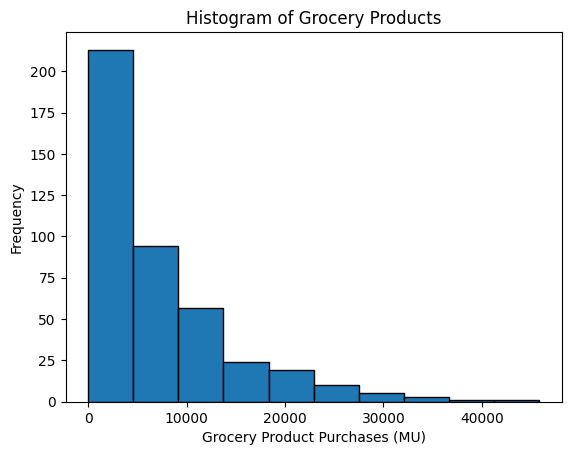

In [280]:
# Create the histogram
plt.hist(data['Grocery'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Grocery Products')
plt.xlabel('Grocery Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

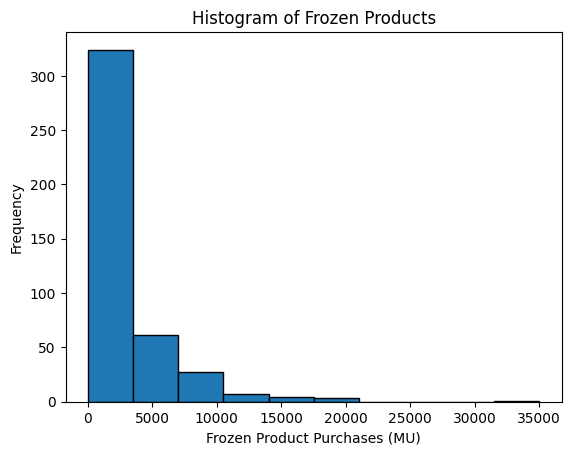

In [281]:
# Create the histogram
plt.hist(data['Frozen'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Frozen Products')
plt.xlabel('Frozen Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [282]:
# Filter for additional outlier detected via histogram
data = data[data['Frozen'] < 25000]

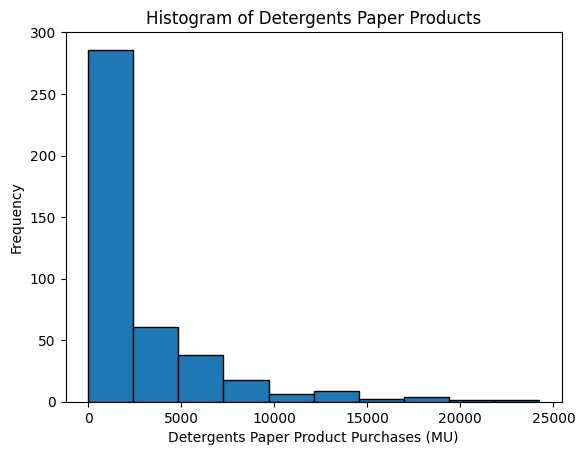

In [283]:
# Create the histogram
plt.hist(data['Detergents_Paper'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Detergents Paper Products')
plt.xlabel('Detergents Paper Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

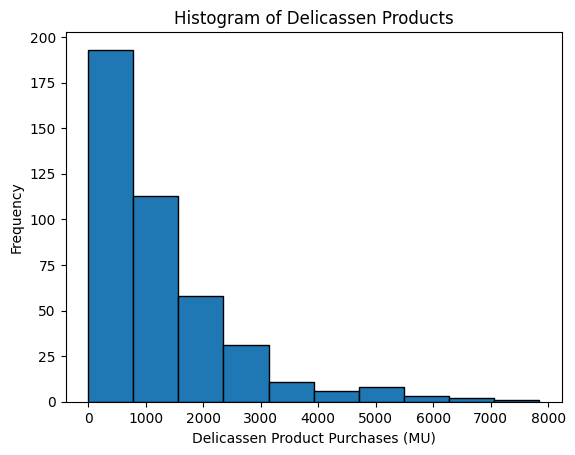

In [284]:
# Create the histogram
plt.hist(data['Delicassen'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Delicassen Products')
plt.xlabel('Delicassen Product Purchases (MU)')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

#### Histogram Conclusion
- All histograms are right skewed, which pulls the mean higher. This also can indicate outliers.
- histogram indicates some outliers, which were adjusted.
- There are going to be large clusters of information near the origin.

<Axes: >

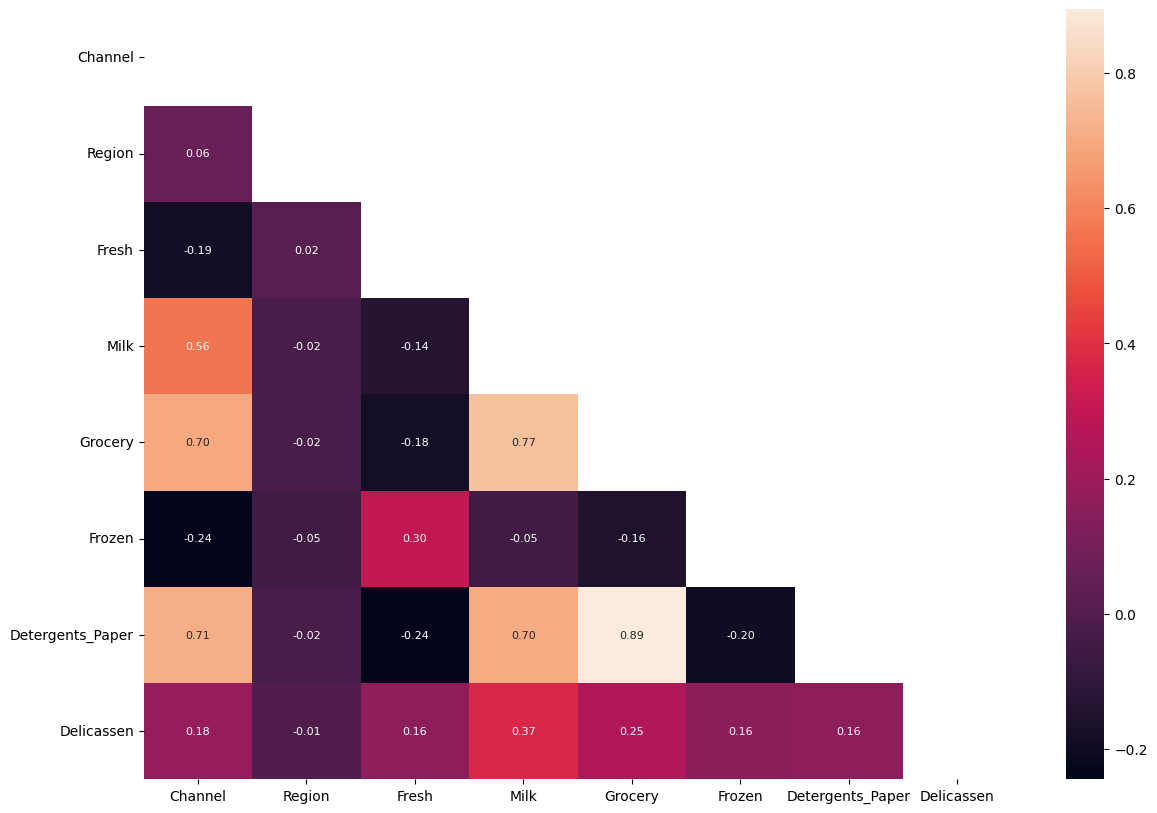

In [285]:
# Correlation heatmap of numerical
plt.figure(figsize=(14, 10))
sns.heatmap(
    data.corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(data.corr(), dtype=bool))
)

#### Correlation Conclusion
- Detergents paper had the highest correlations with Milk (0.7) and Grocery (0.89)
- Milk also had a high correlation with Detergents paper (0.7) and Grocery (0.77) and mild correlation with Delicassen (0.37)
- all others had week correlation between each other 

In [286]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.061423,-0.188316,0.564427,0.700166,-0.236359,0.712446,0.183461
Region,0.061423,1.000000,0.021013,-0.023505,-0.024847,-0.051988,-0.022940,-0.005433
Fresh,-0.188316,0.021013,1.000000,-0.135325,-0.183621,0.298727,-0.244800,0.161829
Milk,0.564427,-0.023505,-0.135325,1.000000,0.767609,-0.047994,0.704823,0.372594
Grocery,0.700166,-0.024847,-0.183621,0.767609,1.000000,-0.155261,0.894375,0.246716
Frozen,-0.236359,-0.051988,0.298727,-0.047994,-0.155261,1.000000,-0.195557,0.156632
Detergents_Paper,0.712446,-0.022940,-0.244800,0.704823,0.894375,-0.195557,1.000000,0.164841
Delicassen,0.183461,-0.005433,0.161829,0.372594,0.246716,0.156632,0.164841,1.000000


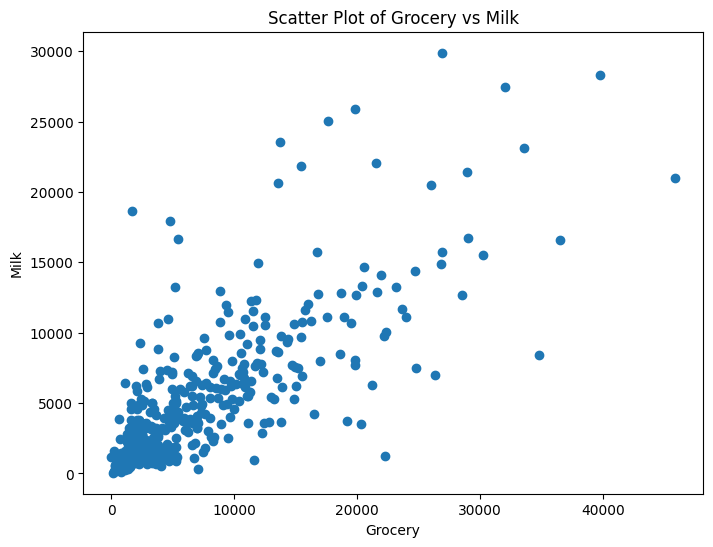

In [287]:
# Scatter plot of  vs Year Built
x= data['Grocery']
y= data['Milk']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Grocery vs Milk')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

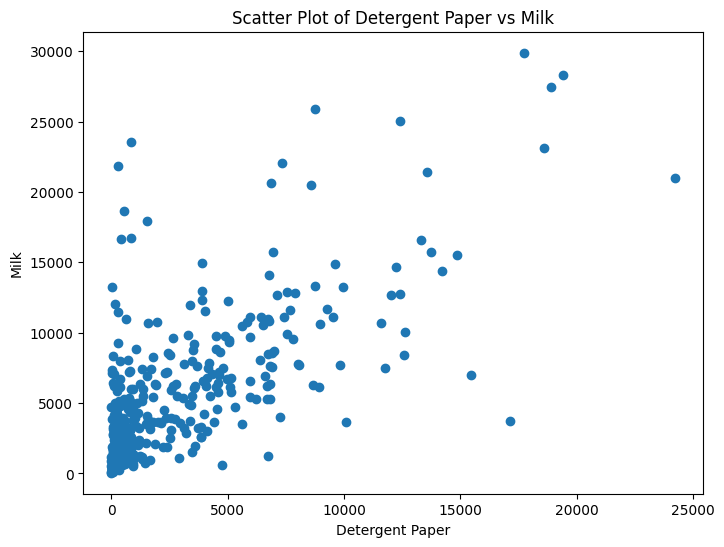

In [288]:
x= data['Detergents_Paper']
y= data['Milk']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Detergent Paper vs Milk')
plt.xlabel('Detergent Paper')
plt.ylabel('Milk')
plt.show()

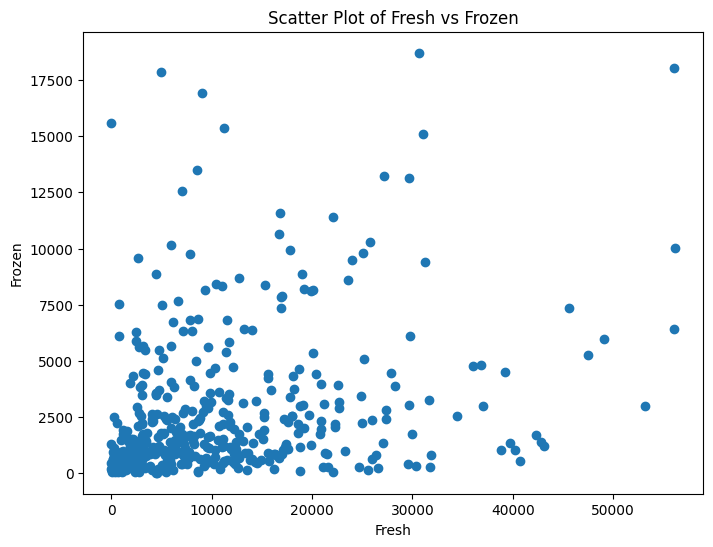

In [289]:
x= data['Fresh']
y= data['Frozen']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Fresh vs Frozen')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

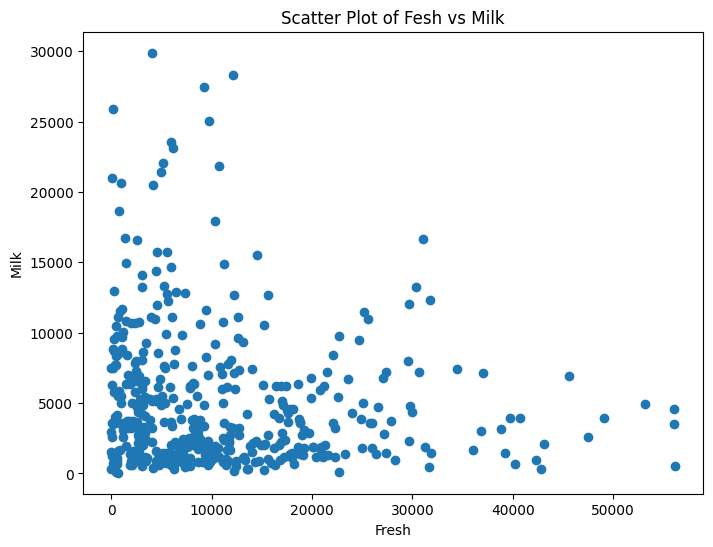

In [290]:
x= data['Fresh']
y= data['Milk']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Fesh vs Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

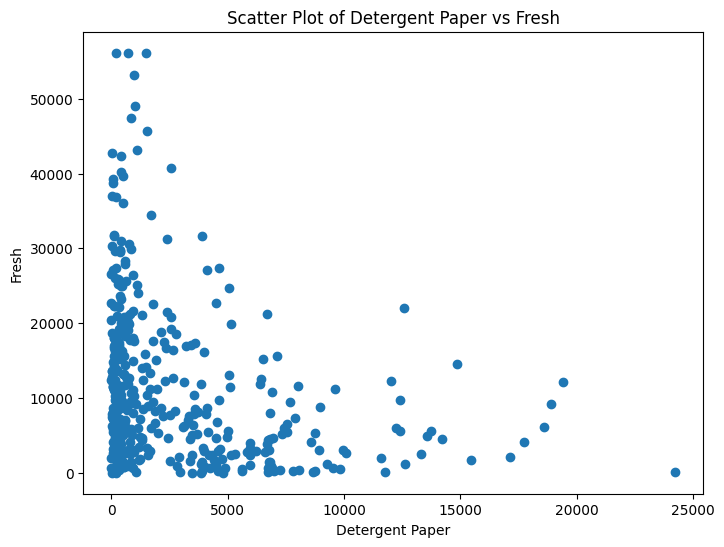

In [291]:
x= data['Detergents_Paper']
y= data['Fresh']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Detergent Paper vs Fresh')
plt.xlabel('Detergent Paper')
plt.ylabel('Fresh')
plt.show()

#### Scatter Plot Conclusion
- scatter plots didn't indicate any meaningful visual cluster groupings
- most plots were grouped close to the origin and spread out along the x and y axis
- This makes sense as only a few features had high correlations with each other

### Scaling


Algorithms like K-Nearest Neighbors (KNN) and clustering algorithms (e.g., K-Means) rely on distance calculations. Scaling features ensures that no single feature dominates the distance metric due to its range.

PCA is sensitive to the variances of the initial variables. Features with larger ranges can dominate the principal components. Scaling ensures that each feature contributes equally to the analysis.

There is quet a big range in values between features: 56k MU max value for Fresh and 8k MU max value for Delicassen. So StandardScaler from scikit-learn will be used

In [292]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [293]:
scaler = StandardScaler()

In [294]:
scaled_data = scaler.fit_transform(data.drop(columns=['Channel','Region']))
scaled_data.shape

(426, 6)

In [295]:
new_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaled_df = pd.DataFrame(scaled_data, columns=new_columns)
scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.147741,0.889660,0.050011,-0.776193,0.024762,0.049230
1,-0.378628,0.919988,0.326444,-0.291515,0.190969,0.401725
2,-0.444659,0.722658,0.066952,-0.090192,0.250847,5.285155
3,0.203642,-0.776425,-0.410021,1.161893,-0.557098,0.411383
4,1.080612,0.053466,0.000014,0.382589,-0.216091,3.145234
...,...,...,...,...,...,...
421,1.745421,1.361324,1.216069,3.269366,-0.644363,0.746173
422,2.638805,-0.730145,-0.886168,0.568883,-0.668261,0.860452
423,0.322385,2.038195,3.174098,-0.706372,3.291716,0.474961
424,-0.075394,-0.621830,-0.683974,-0.518199,-0.648122,0.682595


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [296]:
def plot_distortion(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [297]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

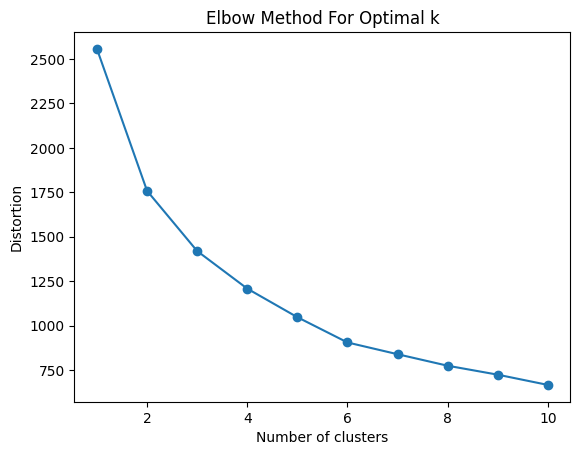

In [298]:
plot_distortion(scaled_data)

We can see in the plot that while the number of clusters increases the distortion goes down and it seems and 2 is the optimal number of clusters

In [299]:
# Fit the model
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km = km.fit_predict(scaled_data)

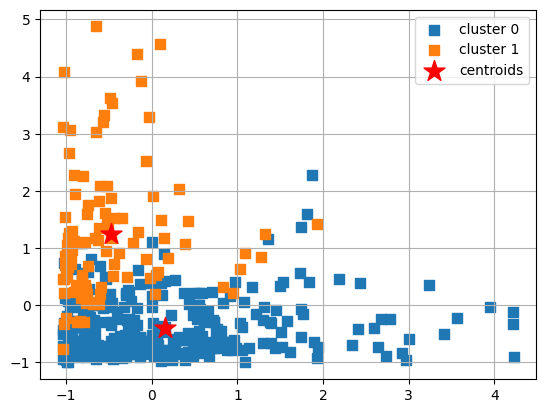

In [300]:
# Fresh and Milk
plot_clusters(scaled_data, y_km, plt_cluster_centers= True)

In [301]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Initialize the KMeans algorithm - elbow rule starts to reduce less at 3
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the algorithm to the PCA-transformed data and predict the cluster for each data point
clusters = kmeans.fit_predict(pca_data)

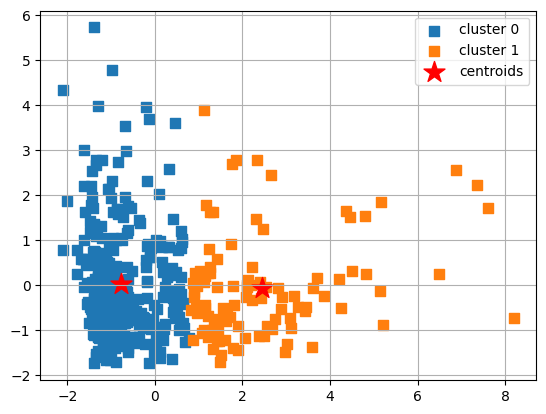

In [302]:
plot_clusters(pca_data, clusters, plt_cluster_centers=True)

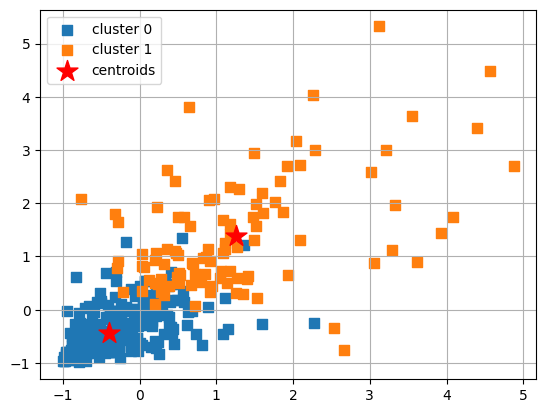

In [303]:
# Milk and Grocery
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km = km.fit_predict(scaled_data)

plot_clusters(scaled_data[:,1:3], y_km, plt_cluster_centers= True)

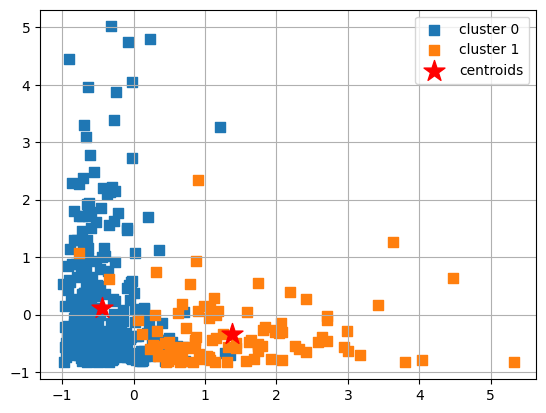

In [304]:
# Grocery and Frozen
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km = km.fit_predict(scaled_data)

plot_clusters(scaled_data[:,2:4], y_km, plt_cluster_centers= True)

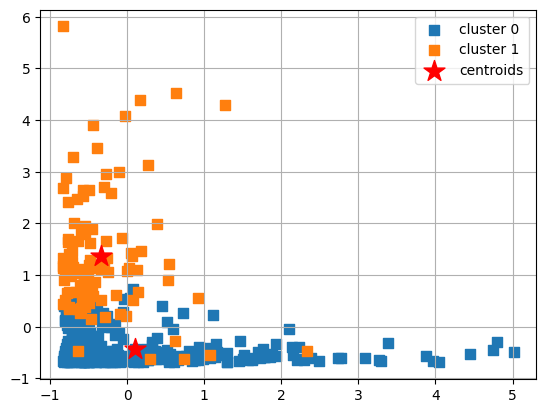

In [305]:
# Frozen and Detergents Paper
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km = km.fit_predict(scaled_data)

plot_clusters(scaled_data[:,3:5], y_km, plt_cluster_centers= True)

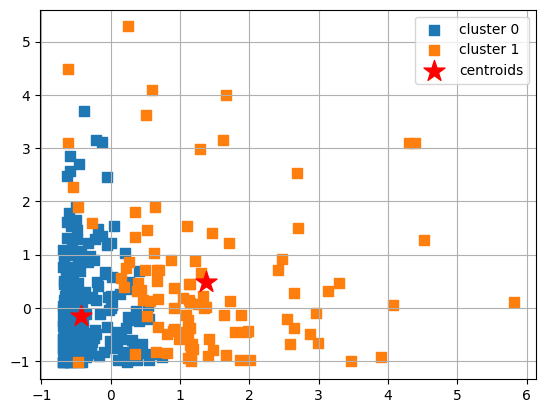

In [306]:
# Detergents Paper and Delicassen
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km = km.fit_predict(scaled_data)

plot_clusters(scaled_data[:,4:6], y_km, plt_cluster_centers= True)

### K-Means Conclusion

Looking at the elbow rule it shows a sharp decline at one and then a gradual descent indicating lower distortion. After testing multiple clusters, the 2 K-Means clusters indicated by the elbow rule clearly displays the best grouping of clusters as illustrated in the above plots.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [307]:
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [308]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [309]:
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 2)

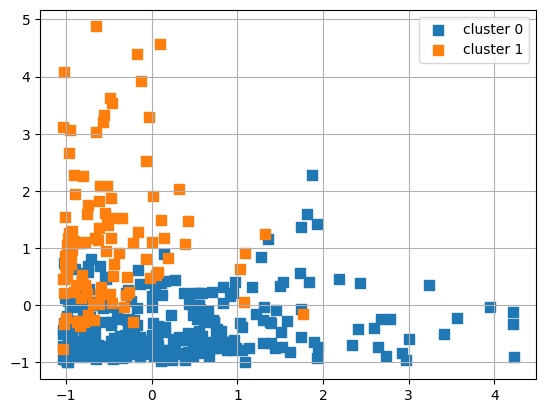

In [310]:
y_hc = ac.fit_predict(scaled_data)
plot_clusters(scaled_data,y_hc)

In [311]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

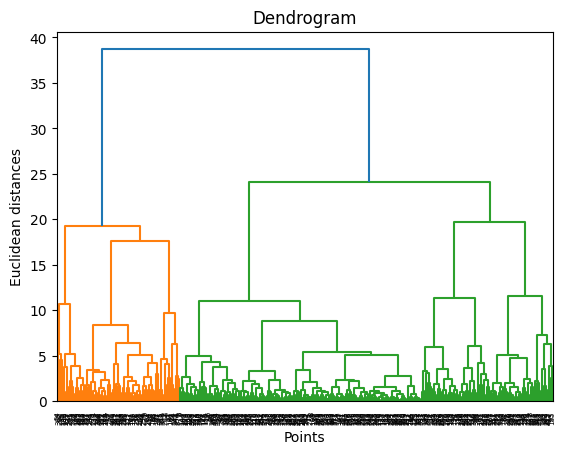

In [312]:
plot_dendrogram(scaled_data)

### Hierarchical Clustering Conclusion

As seen in the Dendogram above, the largest vertical distance between groups is 2 indicating the optimal number of clusters

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [334]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(data)

In [335]:

from sklearn.decomposition import PCA

In [336]:
# Initialize PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization

# Fit PCA on the scaled data and transform it
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


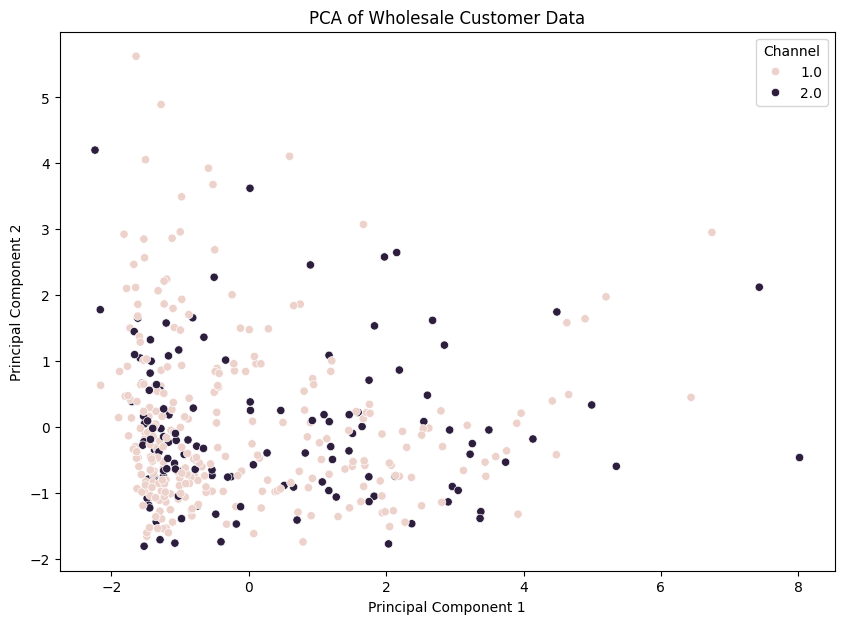

In [337]:
# Plot the PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=data['Channel'])
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Channel')
plt.show()

In [338]:
pca.explained_variance_ratio_

array([0.42203262, 0.18081495])

#### Let's try plotting the explained variance ratio to see the optimal number of principal components
The explained variance tells you how much information (variance) can be attributed to each of the principal components.

In [344]:
pca = PCA(n_components=None) 
dfx_pca = pca.fit_transform(scaled_data)

In [346]:
pca.explained_variance_ratio_

array([0.42203262, 0.18081495, 0.12717101, 0.08967932, 0.08748674,
       0.04905843, 0.03166803, 0.01208891])

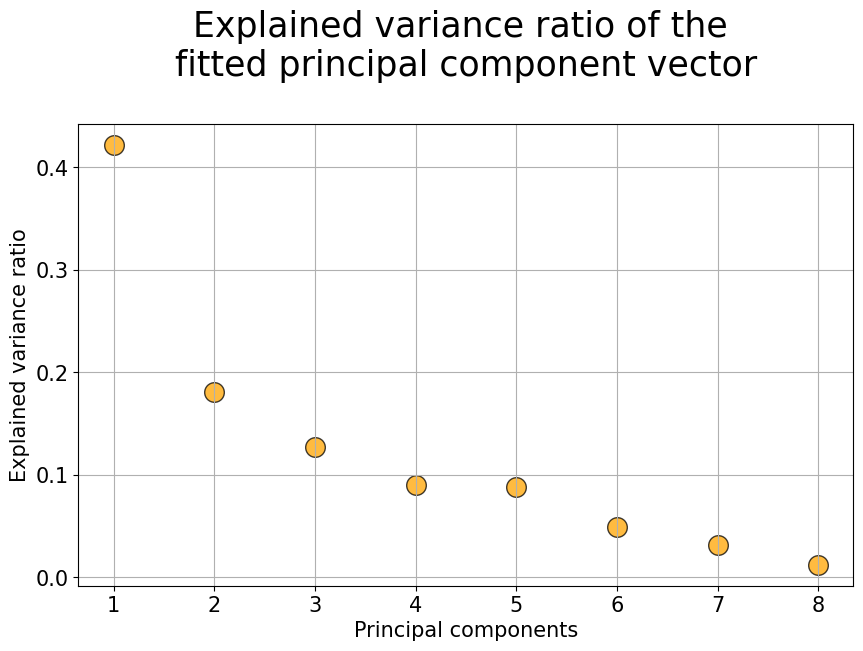

In [347]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

#### PCA Conclusion
We can convert 8 dimensional space to 2 dimensional space. We lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 42% of the variance and the second principal component contains 18% of the variance. Together, the two components contain 60% of the information.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- EDA scatterplots of two variables indicated that both features had large clusters nearest to the origin and then spread out in both directions (x and y). There was no clear clustering.
- K-Means elbow rule indicated that 2 clusters was the optimal number and this was corroborated with mulitple cluster grouping experiments.
- Hierarchical clustering dendogram also indicated 2 clusters was the optimal cluster groupings.
- PCA's variance ratio above shows that 60% of the information is contained in the first two principal compenents. Like K-Means' elbow rule the variance ratio indicates that there should be two principal components.